In [338]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pprint import pprint
import seaborn as sns
import numpy as np
from pprint import pprint

In [ ]:
#################################################################################################

In [ ]:
######################## EPA Data: Annual trends for 2016 and 2017 ##############################

In [339]:
#Import CSV data from the EPA's website to a DataFrame
sfb17_csv = "Raw_Data/EPA_AQI_2017_SFBAY.csv"
sfb17_data = pd.read_csv(sfb17_csv) #For 2017 (IMPORTANT: data available for Jan. - Sep.)
sfb16_csv = "Raw_Data/EPA_AQI_2016_SFBAY.csv"

sfb16_data = pd.read_csv(sfb16_csv) #For 2016 (Comprehensive for the whole of 2016)
print(sfb16_data.columns) #To view table's attributes
print(sfb17_data.columns) 
print("------------------------------")
print(sfb16_data.shape) #To view data's size
print(sfb17_data.shape)
# print("------------------------------")
# print(.dtypes) #To view attributes by type

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
------------------------------
(3292, 10)
(2217, 10)


In [340]:
# Statistical Summary

print('2016')
print(sfb16_data.AQI.describe())
print("------------------------------")
print('2017')
print(sfb17_data.AQI.describe())

2016
count    3292.000000
mean       40.277035
std        14.063939
min        10.000000
25%        31.000000
50%        37.000000
75%        46.000000
max       154.000000
Name: AQI, dtype: float64
------------------------------
2017
count    2217.000000
mean       41.993234
std        13.450989
min        12.000000
25%        33.000000
50%        40.000000
75%        48.000000
max       180.000000
Name: AQI, dtype: float64


In [235]:
####################################### PLOTS ####################################################

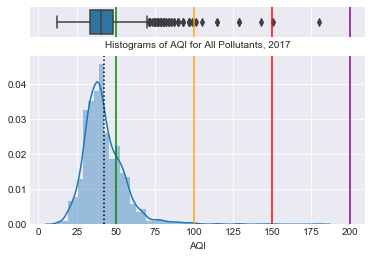

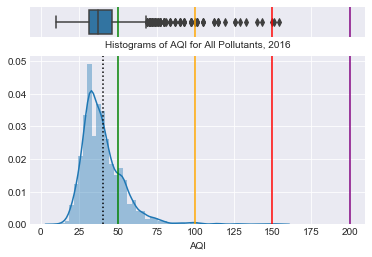

In [341]:
# Histograms

#2017
mean17_AQI = sfb17_data.AQI.mean()
############################ 2017
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(sfb17_data.AQI, ax=ax_box)
sns.distplot(sfb17_data.AQI, ax=ax_hist)
plt.axvline(mean17_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')

# Remove x axis name for the boxplot
ax_box.set(xlabel='Histograms of AQI for All Pollutants, 2017')
ax_box.axvline(50, color='g')
ax_box.axvline(100, color='orange')
ax_box.axvline(150, color='r')
ax_box.axvline(200, color='purple')

#2016
mean16_AQI = sfb16_data.AQI.mean()
############################ 2016
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(sfb16_data.AQI, ax=ax_box)
sns.distplot(sfb16_data.AQI, ax=ax_hist)
plt.axvline(mean16_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g')
plt.axvline(100, color='orange')
plt.axvline(150, color='r')
plt.axvline(200, color='purple')

ax_box.set(xlabel='Histograms of AQI for All Pollutants, 2016')
ax_box.axvline(50, color='g')
ax_box.axvline(100, color='orange')
ax_box.axvline(150, color='r')
ax_box.axvline(200, color='purple')

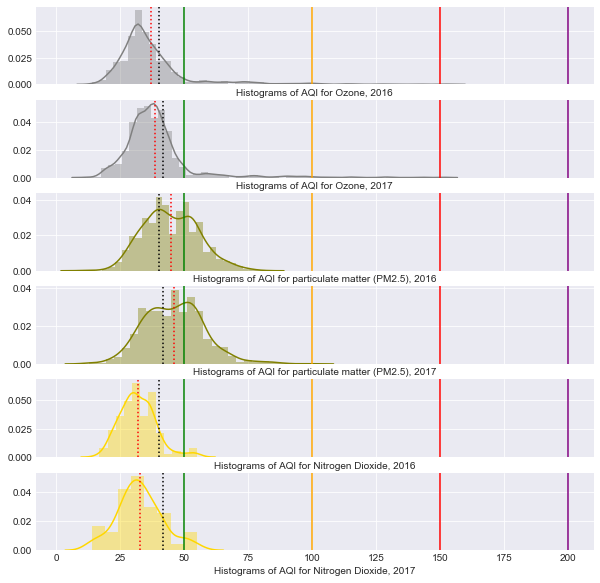

In [363]:
    ## Histogram of AQI's distribution by Pollutant Type

# source : https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/

    
#Mean AQIs per pollutants
    #2016
m16_Oz=sfb16_data[sfb16_data["Defining Parameter"] == 'Ozone'].AQI.mean()
m16_Pm25=sfb16_data[sfb16_data["Defining Parameter"] == 'PM2.5'].AQI.mean()
m16_NO2=sfb16_data[sfb16_data["Defining Parameter"] == 'NO2'].AQI.mean()
    #2017
m17_Oz=sfb17_data[sfb17_data["Defining Parameter"] == 'Ozone'].AQI.mean()
m17_Pm25=sfb17_data[sfb17_data["Defining Parameter"] == 'PM2.5'].AQI.mean()
m17_NO2=sfb17_data[sfb17_data["Defining Parameter"] == 'NO2'].AQI.mean()

###########
f, axes = plt.subplots(6, 1, figsize=(10, 10), sharex=True)

sns.distplot( sfb16_data[sfb16_data["Defining Parameter"] == 'Ozone'].AQI , 
             color="grey", ax=axes[0],label = "Ozone")
axes[0].axvline(m16_Oz, linestyle="dotted",color='r')
axes[0].set(xlabel='Histograms of AQI for Ozone, 2016') #2016

sns.distplot( sfb17_data[sfb17_data["Defining Parameter"] == 'Ozone'].AQI , 
             color="grey", ax=axes[1],label = "Ozone")
axes[1].axvline(m17_Oz, linestyle="dotted",color='r')
axes[1].set(xlabel='Histograms of AQI for Ozone, 2017') #2017

sns.distplot( sfb16_data[sfb16_data["Defining Parameter"] == 'PM2.5'].AQI , 
             color="olive", ax=axes[2],label = "PM2.5")
axes[2].axvline(m16_Pm25, linestyle="dotted",color='r')
axes[2].set(xlabel='Histograms of AQI for particulate matter (PM2.5), 2016') #2016

sns.distplot( sfb17_data[sfb17_data["Defining Parameter"] == 'PM2.5'].AQI , 
             color="olive", ax=axes[3],label = "PM2.5")
axes[3].axvline(m17_Pm25, linestyle="dotted",color='r')
axes[3].set(xlabel='Histograms of AQI for particulate matter (PM2.5), 2017') #2017

sns.distplot( sfb16_data[sfb16_data["Defining Parameter"] == 'NO2'].AQI , 
             color="gold", ax=axes[4],label = "NO2")
axes[4].axvline(m16_NO2, linestyle="dotted",color='r')
axes[4].set(xlabel='Histograms of AQI for Nitrogen Dioxide, 2016') #2016

sns.distplot( sfb17_data[sfb17_data["Defining Parameter"] == 'NO2'].AQI , 
             color="gold", ax=axes[5],label = "NO2")
axes[5].axvline(m17_NO2, linestyle="dotted",color='r')
axes[5].set(xlabel='Histograms of AQI for Nitrogen Dioxide, 2017') #2017

axes[0].axvline(mean16_AQI, linestyle="dotted",color='black')
axes[2].axvline(mean16_AQI, linestyle="dotted",color='black')
axes[4].axvline(mean16_AQI, linestyle="dotted",color='black')
axes[1].axvline(mean17_AQI, linestyle="dotted",color='black')
axes[3].axvline(mean17_AQI, linestyle="dotted",color='black')
axes[5].axvline(mean17_AQI, linestyle="dotted",color='black')

axes[0].axvline(50, color='g')
axes[0].axvline(100, color='orange')
axes[0].axvline(150, color='r')
axes[0].axvline(200, color='purple')
axes[1].axvline(50, color='g')
axes[1].axvline(100, color='orange')
axes[1].axvline(150, color='r')
axes[1].axvline(200, color='purple')
axes[2].axvline(50, color='g')
axes[2].axvline(100, color='orange')
axes[2].axvline(150, color='r')
axes[2].axvline(200, color='purple')
axes[3].axvline(50, color='g')
axes[3].axvline(100, color='orange')
axes[3].axvline(150, color='r')
axes[3].axvline(200, color='purple')
axes[4].axvline(50, color='g')
axes[4].axvline(100, color='orange')
axes[4].axvline(150, color='r')
axes[4].axvline(200, color='purple')
axes[5].axvline(50, color='g')
axes[5].axvline(100, color='orange')
axes[5].axvline(150, color='r')
axes[5].axvline(200, color='purple')

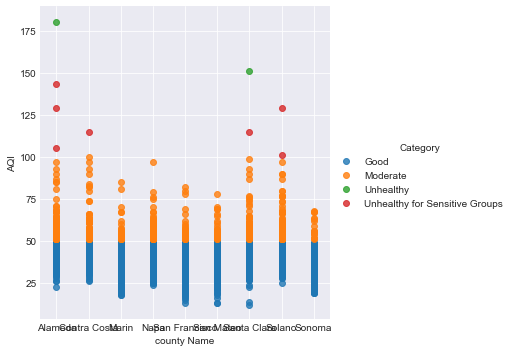

In [238]:
#AQI Distribution for each measurement date
sns.lmplot( x="county Name", y="AQI", data=sfb17_data, fit_reg=False, hue='Category', legend=True)

In [ ]:
#################################################################################################

In [ ]:
#################################################################################################

In [ ]:
########## AIR NOW API Data: 2017 East Bay Fires (October 9th-15th) Case Study, 2017 #############

In [ ]:
#################################################################################################

In [ ]:
#################################################################################################

In [239]:
    # IMPORTANT: AIRNOW API has a 500 hourly request limit per user

Zip_csv = "Raw_Data/countyData.csv" # csv containing the Zip codes we wish to sample for the Bay Area
Zip_data = pd.read_csv(Zip_csv)
Zip_data = Zip_data.head(441) # 441 is the total number of Zip Codes for our 9 selected Bay Area counties
Zip_data = Zip_data.sample(frac=1)

# Each member generated a unique api key to work around the hourly request restriction
from config import api_key 
# from config2 import api_key 
# from config3 import api_key

apikey = api_key
x=0
date_range = ["09","10","11","12","13","14","15"]
i=0
airnow_list=[]
count = 0
for row in Zip_data.itertuples(index=True, name='Pandas'):
   count=count+1
   print (getattr(row, "County"), getattr(row, "Zipcode"))
   zipcode = getattr(row, "Zipcode")
   print(zipcode)
   if (i<7):
    date = "2017-10-"+str(date_range[i])+"T00-0000"
    print(date)
    i=i+1
   else:
       i=0
   
   base_url = "http://www.airnowapi.org/aq/observation/zipCode/historical/?format=application/json&zipCode="+str(zipcode)+"&date="+date+"&distance=25&API_KEY="+apikey
   print(base_url)
   response =  requests.get(base_url).json()
#     print(response)
   airnow_list.append({ str(zipcode): response })
# Save to a DataFrame, concatenate the nested list appropriately
   df1 = pd.concat([pd.concat({k: pd.DataFrame(v) for k, v in x.items()}) for x in airnow_list]).reset_index(level=1, drop=True).reset_index().rename(columns={'index':'zip'})

IndentationError: expected an indented block (<ipython-input-239-0262d7902fcf>, line 25)

In [344]:
    #Save to csv
# df.to_csv("Raw_Data/AirNow_data_Hadrien.csv") #Make sure to rename the output file differently
# df1.to_csv("Raw_Data/AirNow_data_Hadrien_2.csv")
# df2.to_csv("Raw_Data/AirNow_data_Vaishali.csv")
    # Saving each Df to its own csv just to check the output is what we expected it to be

#Import csv as pd
airnow_1_csv = "Raw_Data/AirNow_data_Hadrien.csv"
airnow_1_df = pd.read_csv(airnow_1_csv)
airnow_2_csv = "Raw_Data/AirNow_data_Hadrien_2.csv"
airnow_2_df = pd.read_csv(airnow_2_csv)
airnow_3_csv = "Raw_Data/AirNow_data_Vaishali.csv"
airnow_3_df = pd.read_csv(airnow_3_csv)

# Observe the raw output, verify the integrity of the data
print('**********************')
print("Summary: Invididual DF")
print('**********************')
print(airnow_1_df.shape)
print(airnow_2_df.shape)
print(airnow_3_df.shape)
print('---------------')
print(airnow_1_df.AQI.describe())
print('---------------')
print(airnow_2_df.AQI.describe())
print('---------------')
print(airnow_3_df.AQI.describe())

#############################################################3
# Combine all DF

frames = [airnow_1_df, airnow_2_df, airnow_3_df]

airnow_df = pd.concat(frames, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True) # Reference: https://pandas.pydata.org/pandas-docs/stable/merging.html

    # Save to csv
airnow_csv = airnow_df.to_csv("Raw_Data/AirNow_data_Master.csv")

airnow_csv = "Raw_Data/AirNow_data_Master.csv"
airnow_df = pd.read_csv(airnow_csv)

print('**********************')
print("Summary: Combined DF")
print('**********************')
print(airnow_df.shape)
print('---------------')
print(airnow_df.AQI.describe())
print('---------------')
airnow_df.head()
print('---------------')
print(airnow_df.ParameterName.value_counts())

####################################################
    #Cleanup
# count rows
df_count = airnow_df.zip.count()
print('**********************')
print("Cleaning Summary")
print('**********************')
print("Total rows: " + str(df_count)) # 2495 rows total

#Drop all NaN
nan_drop = airnow_df.dropna(axis=1, how='any').zip.count()
print("Number of rows after drop NaN: " + str(nan_drop)) # 2495 / 2495, thus the API didn't provide any NaN values

# Drop where AQI = -1 ; in the metadata -1 means Null Data
null_drop = airnow_df[airnow_df.AQI != -1].zip.count()
print("Number of rows after drop AQI = -1: " + str(null_drop)) # 2495 / 2495, thus the API didn't provide any Null AQI values

# Drop duplicates with the same ZIP and Date of the AQI readings
airnow_df=airnow_df.drop_duplicates(subset=['zip', 'DateObserved','ParameterName'])
df_count_dup = airnow_df.zip.count()
print("Number of rows after drop duplicates: " + str(df_count_dup) + "  That's " + str(df_count_dup/df_count * 100) + "% of the data remaining!")

#Remove redundant columns
del airnow_df['Unnamed: 0']
del airnow_df['Unnamed: 0.1']

    # Save to csv again -- clean version
airnow_csv = airnow_df.to_csv("Raw_Data/AirNow_data_Master.csv") #Overwrite old file

airnow_csv = "Raw_Data/AirNow_data_Master.csv"
airnow_df = pd.read_csv(airnow_csv)

del airnow_df['Unnamed: 0']

# Final observations: making sure the data post-cleanup is well represented
print('**********************')
print("Post-Cleaning Summary")
print('**********************')
print(airnow_df.AQI.describe())
print(airnow_df.ParameterName.value_counts())

# Variables of interests
    # Pollutant sample counts
samplesize_all = airnow_df['ParameterName'].count() 
samplesize_pm25=  airnow_df[airnow_df['ParameterName'] == "PM2.5"].AQI.count() 
samplesize_ozone=  airnow_df[airnow_df['ParameterName'] == "OZONE"].AQI.count()

# csv containing the Zip codes we wish to sample for the Bay Area
Zip_csv = "Raw_Data/countyData.csv"
Zip_data = pd.read_csv(Zip_csv)

airnow_df = airnow_df.join(Zip_data.set_index('Zipcode'), on='zip')

**********************
Summary: Invididual DF
**********************
(828, 12)
(834, 12)
(833, 12)
---------------
count    828.000000
mean      68.799517
std       39.211064
min       11.000000
25%       40.000000
50%       54.000000
75%       84.000000
max      221.000000
Name: AQI, dtype: float64
---------------
count    834.000000
mean      69.523981
std       40.428616
min       19.000000
25%       41.000000
50%       54.000000
75%       84.000000
max      265.000000
Name: AQI, dtype: float64
---------------
count    833.000000
mean      70.164466
std       40.386452
min       19.000000
25%       41.000000
50%       54.000000
75%       84.000000
max      221.000000
Name: AQI, dtype: float64
**********************
Summary: Combined DF
**********************
(2495, 13)
---------------
count    2495.000000
mean       69.497395
std        40.002284
min        11.000000
25%        41.000000
50%        54.000000
75%        84.000000
max       265.000000
Name: AQI, dtype: float64
-------

In [ ]:
####################################### PLOTS ####################################################

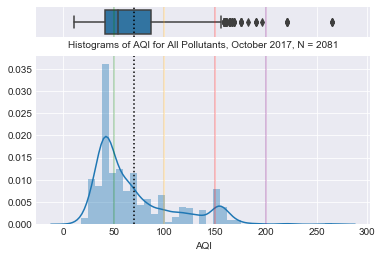

In [356]:
        ## Histogram of the distribution of AQI for Oct. 9th-15th

#First DF
dfair_Avg_AQI = airnow_df.AQI.mean()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})


# Add a graph in each part
sns.boxplot(airnow_df.AQI, ax=ax_box)
sns.distplot(airnow_df.AQI, ax=ax_hist)
plt.axvline(dfair_Avg_AQI, linestyle="dotted",color='black')

plt.axvline(50, color='g',alpha=0.3)
plt.axvline(100, color='orange',alpha=0.3)
plt.axvline(150, color='r',alpha=0.3)
plt.axvline(200, color='purple',alpha=0.3)


# Remove x axis name for the boxplot
ax_box.set(xlabel='Histograms of AQI for All Pollutants, October 2017,' + ' N = '+ str(samplesize_all))
ax_box.axvline(dfair_Avg_AQI, linestyle="dotted",color='black')
ax_box.axvline(50, color='g',alpha=0.3)
ax_box.axvline(100, color='orange',alpha=0.3)
ax_box.axvline(150, color='r',alpha=0.3)
ax_box.axvline(200, color='purple',alpha=0.3)

# Save as png
plt.savefig('Outputs/AirNow_Hist.png')

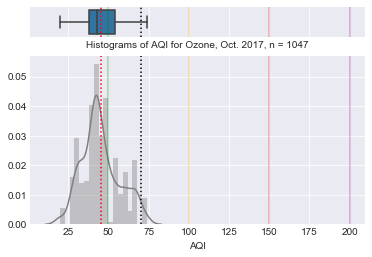

In [362]:
    ## Histogram of AQI's distribution by Pollutant Type, October 2017

# source : https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/

    
#Mean AQIs per pollutants

    #Oct 2017
m17_Oz=airnow_df[airnow_df["ParameterName"] == 'OZONE'].AQI.mean()
airnow_df_ozone = airnow_df[airnow_df["ParameterName"] == 'OZONE']

###########
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(airnow_df_ozone.AQI, ax=ax_box)
sns.distplot(airnow_df_ozone.AQI , color="grey",label = "OZONE")
plt.axvline(m17_Oz, linestyle="dotted",color='red')
plt.axvline(dfair_Avg_AQI, linestyle="dotted",color='black')


plt.axvline(50, color='g',alpha=0.3)
plt.axvline(100, color='orange',alpha=0.3)
plt.axvline(150, color='r',alpha=0.3)
plt.axvline(200, color='purple',alpha=0.3)

ax_box.set(xlabel='Histograms of AQI for Ozone, Oct. 2017,' + ' n = '+ str(samplesize_ozone))
ax_box.axvline(m17_Oz, linestyle="dotted",color='red')
ax_box.axvline(dfair_Avg_AQI, linestyle="dotted",color='black')
ax_box.axvline(50, color='g',alpha=0.3)
ax_box.axvline(100, color='orange',alpha=0.3)
ax_box.axvline(150, color='r',alpha=0.3)
ax_box.axvline(200, color='purple',alpha=0.3)

# Save as png
plt.savefig('Outputs/AirNow_Ozone_Hist.png')

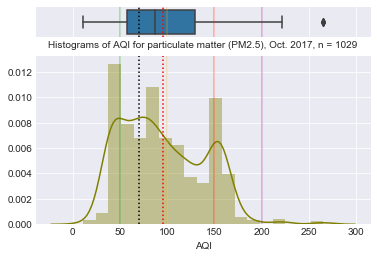

In [358]:
    #Oct 2017
    
m17_pm25 =airnow_df[airnow_df["ParameterName"] == 'PM2.5'].AQI.mean()
airnow_df_pm25 = airnow_df[airnow_df["ParameterName"] == 'PM2.5']

###########
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(airnow_df_pm25.AQI, ax=ax_box)
sns.distplot(airnow_df_pm25.AQI , color="olive",label = "PM 2.5")
plt.axvline(m17_pm25, linestyle="dotted",color='red')
plt.axvline(dfair_Avg_AQI, linestyle="dotted",color='black')


plt.axvline(50, color='g',alpha=0.3)
plt.axvline(100, color='orange',alpha=0.3)
plt.axvline(150, color='r',alpha=0.3)
plt.axvline(200, color='purple',alpha=0.3)

ax_box.set(xlabel='Histograms of AQI for particulate matter (PM2.5), Oct. 2017,' + ' n = '+ str(samplesize_pm25))
ax_box.axvline(m17_pm25, linestyle="dotted",color='red')
ax_box.axvline(dfair_Avg_AQI, linestyle="dotted",color='black')
ax_box.axvline(50, color='g',alpha=0.3)
ax_box.axvline(100, color='orange',alpha=0.3)
ax_box.axvline(150, color='r',alpha=0.3)
ax_box.axvline(200, color='purple',alpha=0.3)

# Save as png
plt.savefig('Outputs/AirNow_PM25_Hist.png')

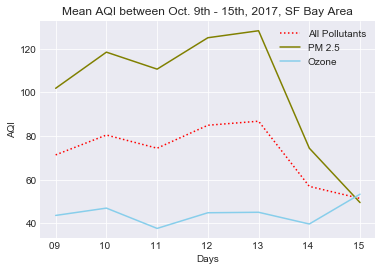

In [350]:
        ## Timeseries of AQI for Oct. 9th-15th

#Bin by Day
airnow_df['Day']=airnow_df.DateObserved.apply(lambda x: str(x)[8:])
airnow_df['Day']

airnow_df_day_m = airnow_df.groupby("Day").mean()
# airnow_df_m = airnow_df.AQI.mean()
AQI_m_perday = airnow_df_day_m.AQI
AQI_m_perday #Trendline

pm25_m = airnow_df[airnow_df["ParameterName"] == 'PM2.5'].groupby('Day').mean()
pm25_m = pm25_m.AQI
ozone_m = airnow_df[airnow_df["ParameterName"] == 'OZONE'].groupby('Day').mean()
ozone_m = ozone_m.AQI

#Avg. AQI per day during Oct. 9th-15th 2017
sns.set_style("darkgrid")
plt.plot(AQI_m_perday,linestyle="dotted",color='red',label="All Pollutants") # Avg. for all pollutants/day
plt.plot(pm25_m,color='olive',label="PM 2.5")
plt.plot(ozone_m,color='skyblue',label="Ozone")
plt.title('Mean AQI between Oct. 9th - 15th, 2017, SF Bay Area')
plt.xlabel('Days')
plt.ylabel('AQI')
plt.legend(loc=1, ncol=1)

plt.show()

plt.savefig('Outputs/AirNow_TimeSeries_Oct2017.png')

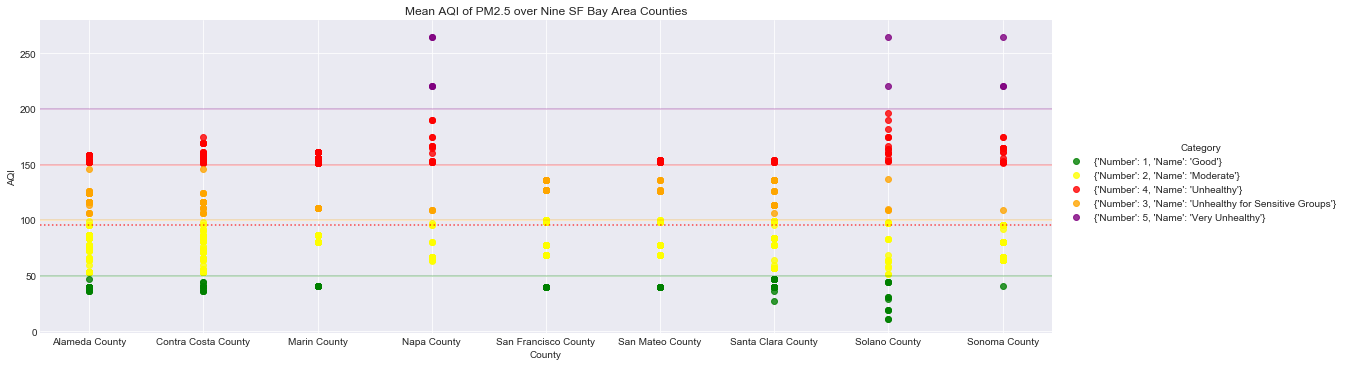

In [359]:
    #AQI Distribution of PM2.5 for each county

airnow_df_pm25 = airnow_df.loc[airnow_df['ParameterName'] == "PM2.5"]

palette ={"{'Number': 1, 'Name': 'Good'}":"green",
          "{'Number': 2, 'Name': 'Moderate'}":"yellow",
          "{'Number': 3, 'Name': 'Unhealthy for Sensitive Groups'}":"orange", 
          "{'Number': 4, 'Name': 'Unhealthy'}":"red",
         "{'Number': 5, 'Name': 'Very Unhealthy'}":"purple",
         }

sns.lmplot( x="County", y="AQI", data=airnow_df_pm25, fit_reg=False, hue="Category", 
           aspect = 3,legend=True,palette=palette)

plt.axhline(m17_pm25, color='red',linestyle="dotted",alpha=0.7)
plt.axhline(50, color='g',alpha=0.3)
plt.axhline(100, color='orange',alpha=0.3)
plt.axhline(150, color='r',alpha=0.3)
plt.axhline(200, color='purple',alpha=0.3)
plt.title('Mean AQI of PM2.5 over Nine SF Bay Area Counties')


plt.savefig('Outputs/AirNow_PM25xAQIxCounty_Oct2017.png')

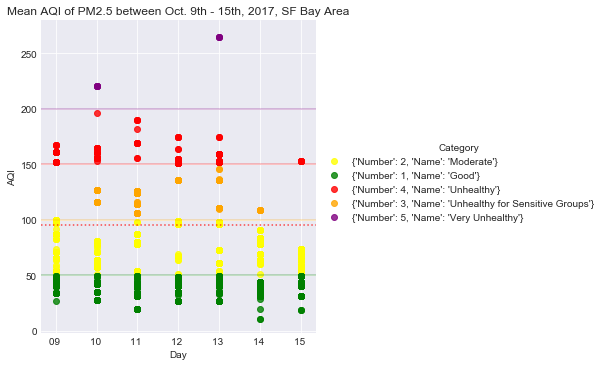

In [360]:
    #AQI Distribution of PM2.5 for each day
    
palette ={"{'Number': 1, 'Name': 'Good'}":"green",
          "{'Number': 2, 'Name': 'Moderate'}":"yellow",
          "{'Number': 3, 'Name': 'Unhealthy for Sensitive Groups'}":"orange", 
          "{'Number': 4, 'Name': 'Unhealthy'}":"red",
         "{'Number': 5, 'Name': 'Very Unhealthy'}":"purple",
         }

sns.lmplot( x="Day", y="AQI", data=airnow_df, fit_reg=False, hue='Category', legend=True
          ,palette=palette)

plt.axhline(m17_pm25, color='red',linestyle="dotted",alpha=0.7)
plt.axhline(50, color='g',alpha=0.3)
plt.axhline(100, color='orange',alpha=0.3)
plt.axhline(150, color='r',alpha=0.3)
plt.axhline(200, color='purple',alpha=0.3)
plt.title('Mean AQI of PM2.5 between Oct. 9th - 15th, 2017, SF Bay Area')


plt.savefig('Outputs/AirNow_PM25xAQIxDate_Oct2017.png')

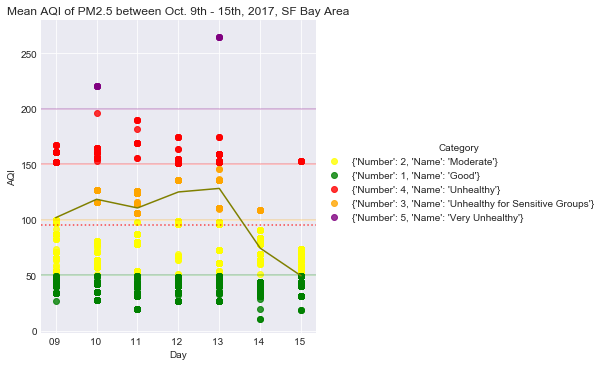

In [361]:
    #AQI Distribution of PM2.5 for each day
    
palette ={"{'Number': 1, 'Name': 'Good'}":"green",
          "{'Number': 2, 'Name': 'Moderate'}":"yellow",
          "{'Number': 3, 'Name': 'Unhealthy for Sensitive Groups'}":"orange", 
          "{'Number': 4, 'Name': 'Unhealthy'}":"red",
         "{'Number': 5, 'Name': 'Very Unhealthy'}":"purple",
         }

sns.lmplot( x="Day", y="AQI", data=airnow_df, fit_reg=False, hue='Category', legend=True
          ,palette=palette)

plt.axhline(m17_pm25, color='red',linestyle="dotted",alpha=0.7)
plt.axhline(50, color='g',alpha=0.3)
plt.axhline(100, color='orange',alpha=0.3)
plt.axhline(150, color='r',alpha=0.3)
plt.axhline(200, color='purple',alpha=0.3)
plt.plot(pm25_m,color='olive',label="PM 2.5")
plt.title('Mean AQI of PM2.5 between Oct. 9th - 15th, 2017, SF Bay Area')

plt.savefig('Outputs/AirNow_PM25xAQIxDateV2_Oct2017.png')